In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
#Read Data from adult.data file

columns = ['Age', 'WorkClass', 'FNLWGT', 'Education', 'EducationNum',
           'MaritalStatus','Occupation','Relationship','Race','Sex', 
           'CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry', 'Income']

train_data = pd.read_csv('Dataset/adult.data', sep=', ', names=columns, engine='python')
test_data = pd.read_csv('Dataset/adult.test', sep=', ', names=columns, engine='python')

In [82]:
def clean_data (dataset) :
    
    #Remove the rows having '?'
    dataset = dataset[~(dataset[columns] == '?').any(axis=1)]
    
    #Remove rows having 'NaN'
    dataset = dataset.dropna()
    
    #Reset index
    dataset = dataset.reset_index(drop=True)
    
    # Replace '>50K.' with '>50K' and '<=50K.' with '<=50K' 
    dataset = dataset.replace('>50K.', '>50K')
    dataset = dataset.replace('<=50K.', '<=50K')
    
    return dataset
    

In [83]:
def concatDataframe (dataset1, dataset2):
    return pd.concat([dataset1, dataset2], ignore_index=True)

In [84]:
train_data = clean_data(train_data)

In [85]:
test_data = clean_data(test_data)

In [86]:
concatenate_dataset = concatDataframe(train_data, test_data)

In [87]:
concatenate_dataset

,Age,WorkClass,FNLWGT,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [91]:
df = concatenate_dataset.groupby(['WorkClass','Income']).size()
df

WorkClass         Income
Federal-gov       <=50K       857
                  >50K        549
Local-gov         <=50K      2185
                  >50K        915
Private           <=50K     26056
                  >50K       7251
Self-emp-inc      <=50K       734
                  >50K        912
Self-emp-not-inc  <=50K      2737
                  >50K       1059
State-gov         <=50K      1426
                  >50K        520
Without-pay       <=50K        19
                  >50K          2
dtype: int64

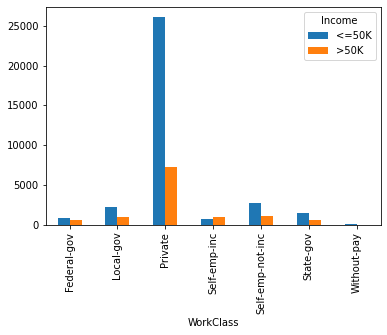

In [89]:
df=df.unstack()
df.plot(kind='bar')
plt.show()